In [20]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter, WeibullAFTFitter, CoxPHFitter, statistics


In [ ]:
# statistics.logrank_test

#### Reading Data

In [104]:
df = pd.read_csv('kaggle_datasets/Predictive Analytics for Customer Churn: Dataset/train.csv')
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [105]:
df_churn_bar = pd.DataFrame()
df_churn_bar['churn'] = df.Churn.unique()
df_churn_bar['percentage'] = df.Churn.value_counts() / df.Churn.count()
df_churn_bar['count'] = df.Churn.value_counts()
df_churn_bar

,churn,percentage,count
0,0,0.818768,199605
1,1,0.181232,44182


In [72]:
base = alt.Chart(df_churn_bar).encode(x='churn:N')
bar = base.mark_bar().encode(alt.Y('count:Q'))
line =  base.mark_line(color='red').encode(alt.Y('percentage:Q').axis(format='%'))
(bar + line).resolve_scale(y='independent').properties(width=400, height=400)

alt.LayerChart(...)

In [81]:
df_km = df[df['Churn'] == 1][['AccountAge', 'Churn']]

<Axes: xlabel='timeline'>

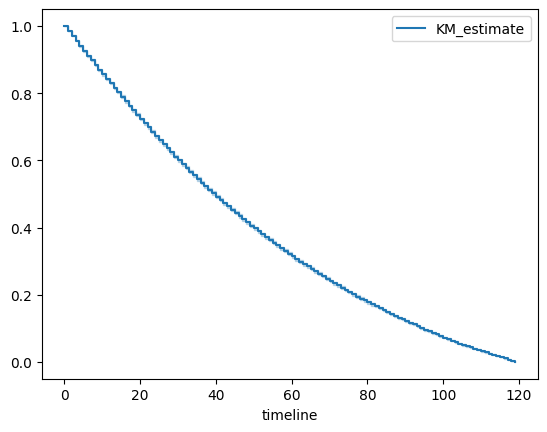

In [106]:
kmf = KaplanMeierFitter()
kmf.fit_right_censoring(durations=df_km['AccountAge'], event_observed=df_km['Churn'])
kmf.plot_survival_function()

In [95]:
# kmf.plot_cumulative_density()
kmf.survival_function_at_times(40)

40    0.492327
Name: KM_estimate, dtype: float64

In [90]:
wbf = WeibullAFTFitter()
wbf.fit(df=df_km, duration_col='AccountAge', event_col='Churn')
wbf.summary

,,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
param,covariate,,,,,,,,,,,
lambda_,Intercept,3.903084,49.555032,0.003707,3.895818,3.910349,49.196291,49.916388,0.0,1052.898997,0.0,inf
rho_,Intercept,0.297292,1.346208,0.003903,0.289642,0.304941,1.335949,1.356546,0.0,76.167840,0.0,inf


In [109]:
cph = CoxPHFitter()
cph.fit(df_km, duration_col='AccountAge', event_col='Churn')
cph.print_summary()
# plt.subplots(figsize = (10, 6))
# cph.plot()

<lifelines.CoxPHFitter: fitted with 44182 total observations, 0 right-censored observations>
             duration col = 'AccountAge'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 44182
number of events observed = 44182
   partial log-likelihood = -428398.15
         time fit was run = 2024-04-05 22:14:49 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 856796.31
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

In [ ]:
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [50, 60, 70, 80], cmap = 'coolwarm')